In [1]:
import tensorflow as tf
import tensorflow_probability as tfp

# Generate data

Random sample from Binomial with N=60, and $\theta = 0.6$.

In [3]:
tfd = tfp.distributions

In [4]:
dist = tfd.Binomial(total_count=60, probs=0.6)

In [5]:
sample = dist.sample(1)

In [6]:
sample

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([38.], dtype=float32)>

# Posterior Probability - Unifor prior

In [7]:
thetas = tf.linspace(start=0., stop=1., num=500) # hypotheses

In [9]:
dists = tfd.Binomial(total_count=60, probs=thetas) # * P(theta) -> prior

In [10]:
probs = dists.prob(sample) # P(data|H)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
sample / 60 # MAP estimate should be this

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.6333333], dtype=float32)>

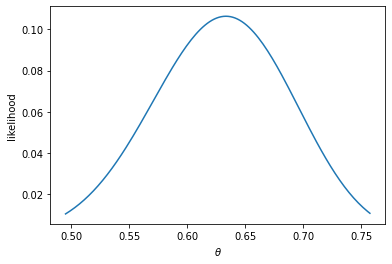

In [17]:
idx = probs > 0.01
plt.plot(thetas[idx], probs[idx])
plt.ylabel('likelihood')
plt.xlabel('$\\theta$')
None

# Posterior sampling

In [20]:
log_prob = dists.log_prob(sample)
N = 10000

In [25]:
tf.random.categorical(tf.math.log([[0.2, 0.8]]), 10)

<tf.Tensor: shape=(1, 10), dtype=int64, numpy=array([[0, 1, 1, 0, 0, 1, 1, 1, 1, 0]])>

In [26]:
idx = tf.random.categorical([log_prob], N)

In [28]:
theta_sample = tf.gather(thetas, idx)

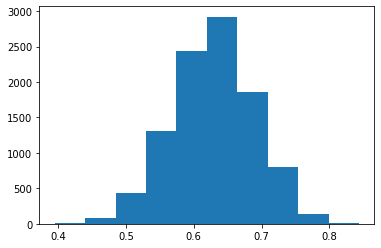

In [30]:
plt.hist(theta_sample)
None

In [33]:
posterior_sample = tfd.Binomial(total_count=60, probs=theta_sample).sample(1)[0,0,:]

In [36]:
unique, idxs, counts = tf.unique_with_counts(posterior_sample)

<BarContainer object of 37 artists>

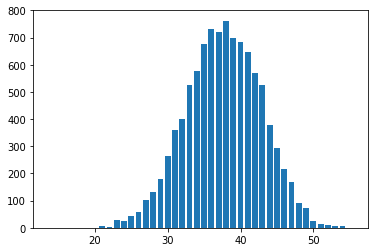

In [37]:
plt.bar(unique, counts)